In [1]:
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_csv('cleaned_data.csv')
filtered_category = df[df['Category'] != 'All Other Remote']

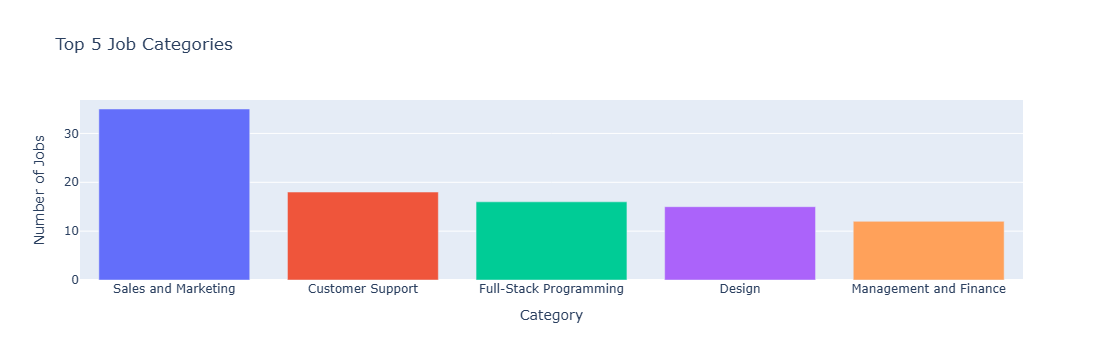

In [16]:
# Find the top 5 most common job categories
top_5_categories = filtered_category['Category'].value_counts().head(5)

# Create a bar chart using Plotly Express
bar_categories =    px.bar(
                    top_5_categories,
                    x=top_5_categories.index,
                    y=top_5_categories.values,
                    title="Top 5 Job Categories",
                    labels={'x': 'Category', 'y': 'Number of Jobs'},
                    color = top_5_categories.index,
)

bar_categories.update_traces(hovertemplate='<b>%{y}</b> jobs<extra></extra>')
bar_categories.update_layout(showlegend=False)

# In Jupyter, you can display the figure directly to test it
fig.show()

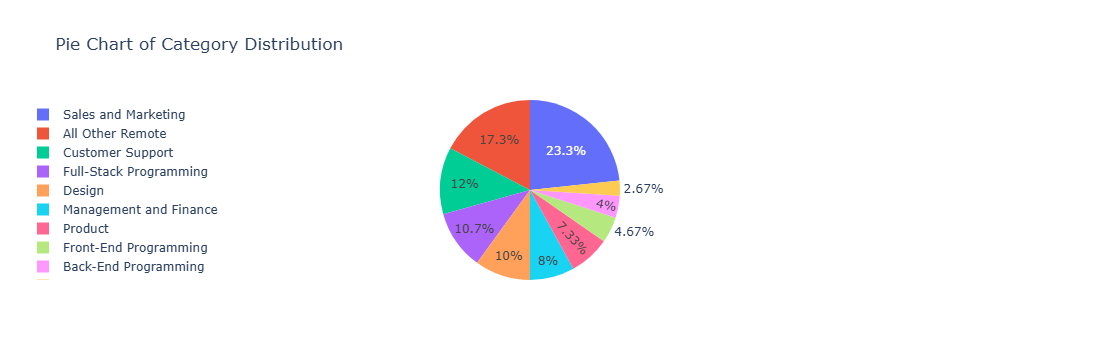

In [27]:
# Create category pie
categories = df['Category'].value_counts()

pie_categories = px.pie(
    categories,
    values = categories.values,
    names = categories.index,
    title = 'Pie Chart of Category Distribution'
)

pie_categories.update_layout(
    legend=dict(
        orientation="v",
        yanchor="auto",
        y=0.5, # Center the legend vertically
        xanchor="right",
        x=0 # Position the legend's right edge at the plot's left edge
    )
)

pie_categories.update_traces(hovertemplate='<b>%{value}</b> jobs<extra></extra>')


pie_categories.show()

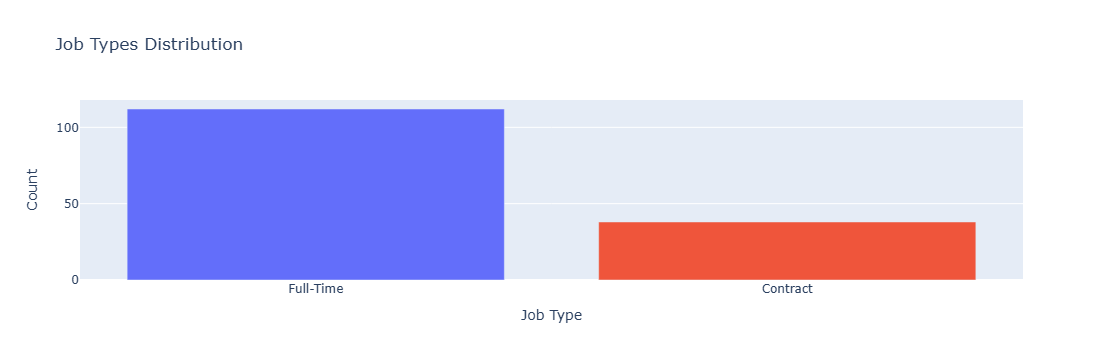

In [15]:
job_types = df['Job Type'].value_counts()

fig_jobtypes = px.bar(
    job_types,
    x = job_types.index,
    y = job_types.values,
    title = "Job Types Distribution",
    labels={'x': 'Job Types', 'y': 'Count'},
    color= job_types.index
)

fig_jobtypes.update_traces(hovertemplate='<b>%{y}</b> jobs<extra></extra>')
fig_jobtypes.update_layout(showlegend=False)

fig_jobtypes.show()

Job Type
Full-Time    112
Contract      38
Name: count, dtype: int64